In [1]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /anaconda/lib/python3.6/site-packages (19.1.1)


In [2]:
import sys
sys.path.append("/anaconda/lib/python3.6/site-packages")

In [3]:
!brew install graphviz
!pip install pygraphviz --install-option="--include-path=/usr/local/include/graphviz/" \
--install-option="--library-path=/usr/local/lib/graphviz"

To reinstall 2.40.1, run `brew reinstall graphviz`
//anaconda/lib/python3.6/site-packages/pip/_internal/commands/install.py:244: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)


In [4]:
from datascience import *
from IPython.display import Image
from bokeh.charts import HeatMap, output_file, show
import pygraphviz as PG
import numpy as np
%matplotlib inline

In [5]:
tu38 = Table().read_table('offeringsDrum.csv')

tu38

section,offering,utensil,material,decoration,count,number,quantity,measurement,type of substance,position,occasion,personnel,deity,day,month,text,additional
1,serqu offering,nan,nan,nan,1,1,nan,nan,assemblage,nan,nan,priest,the great gods,favorable day,auspicious month,TU 44,nan
1,first quality beer,nan,nan,nan,1,1,nan,nan,beer,nan,nan,priest,the great gods,favorable day,auspicious month,TU 44,nan
1,barley bread,nan,nan,nan,1,7,nan,nan,bread,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,nan
1,emmer bread,nan,nan,nan,1,7,nan,nan,bread,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,nan
1,barley bread,nan,nan,nan,1,7,nan,nan,bread,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,nan
1,emmer bread,nan,nan,nan,1,7,nan,nan,bread,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,nan
1,mirsu cake,nan,nan,nan,1,1,nan,nan,confection,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,"made with honey, ghee, dates, and sisqu flour"
1,shoulder,nan,nan,nan,1,1,nan,nan,meat,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,part of the innards
1,himsu omentum,nan,nan,nan,1,1,nan,nan,meat,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,nan
1,roasted meat,nan,nan,nan,1,1,nan,nan,meat,nan,nan,priest,[text damaged],favorable day,auspicious month,TU 44,nan


In [6]:
tu38_tree = tu38.select('deity', 'type of substance', 'offering')
tu38_tree

deity,type of substance,offering
the great gods,assemblage,serqu offering
the great gods,beer,first quality beer
[text damaged],bread,barley bread
[text damaged],bread,emmer bread
[text damaged],bread,barley bread
[text damaged],bread,emmer bread
[text damaged],confection,mirsu cake
[text damaged],meat,shoulder
[text damaged],meat,himsu omentum
[text damaged],meat,roasted meat


In [7]:
permutations = tu38_tree.group(['deity', 'type of substance', 'offering']).drop('count')
original = permutations.copy()

count = 0
while count < permutations.num_columns-1:
    changed = permutations.apply((lambda x,y: x + ' ' + y), [count,count+1])
    count += 1
    permutations[permutations.labels[count]] = changed
permutations

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


deity,type of substance,offering
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum beer,Ea; Shamash; Marduk; Lumha; divine kettledrum beer first ...
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum livestock,Ea; Shamash; Marduk; Lumha; divine kettledrum livestock ...
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum meat,Ea; Shamash; Marduk; Lumha; divine kettledrum meat himsu ...
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum meat,Ea; Shamash; Marduk; Lumha; divine kettledrum meat roast ...
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum meat,Ea; Shamash; Marduk; Lumha; divine kettledrum meat shoulder
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum milk,Ea; Shamash; Marduk; Lumha; divine kettledrum milk milk
Ea; Shamash; Marduk; Lumha; divine kettledrum,Ea; Shamash; Marduk; Lumha; divine kettledrum wine,Ea; Shamash; Marduk; Lumha; divine kettledrum wine wine
Lumha,Lumha beer,Lumha beer first quality beer
Lumha,Lumha livestock,Lumha livestock sheep
Lumha,Lumha meat,Lumha meat himsu omentum


In [8]:
label_dictionary = {}

for row in range(original.num_rows):
    graph_row = original.take(row)
    key_row = permutations.take(row)
    for i in range(original.num_columns):
        label_dictionary[key_row.get(i)[0]] = graph_row.get(i)[0]
label_dictionary

{'Ea; Shamash; Marduk; Lumha; divine kettledrum': 'Ea; Shamash; Marduk; Lumha; divine kettledrum',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum beer': 'beer',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum beer first quality beer': 'first quality beer',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum livestock': 'livestock',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum livestock sheep': 'sheep',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum meat': 'meat',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum meat himsu omentum': 'himsu omentum',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum meat roasted meat': 'roasted meat',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum meat shoulder': 'shoulder',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum milk': 'milk',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum milk milk': 'milk',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum wine': 'wine',
 'Ea; Shamash; Marduk; Lumha; divine kettledrum wine wine': 'wine',
 'Lumha': 'Lumha',
 'Lu

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


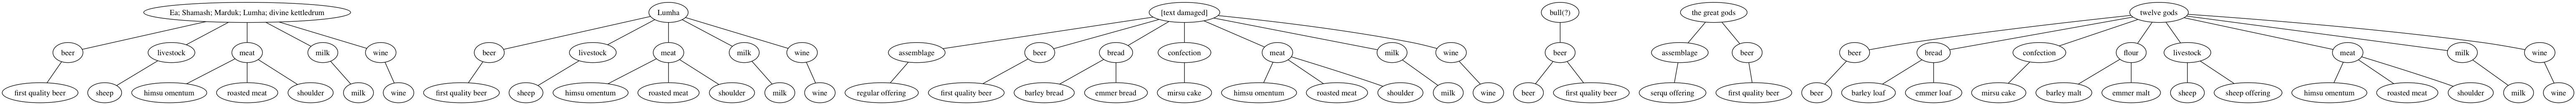

In [11]:
T = PG.AGraph()

for x in label_dictionary.keys():
    T.add_node(x, label=label_dictionary[x])
        
count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: T.add_edge(x,y)), [count,count+1])
    count += 1
    
T.write('ademo.dot')
T.layout(prog='dot')
T.draw('file.png')
Image('file.png')


In [12]:
from PIL import Image
im = Image.open("file.png")
im.show()

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


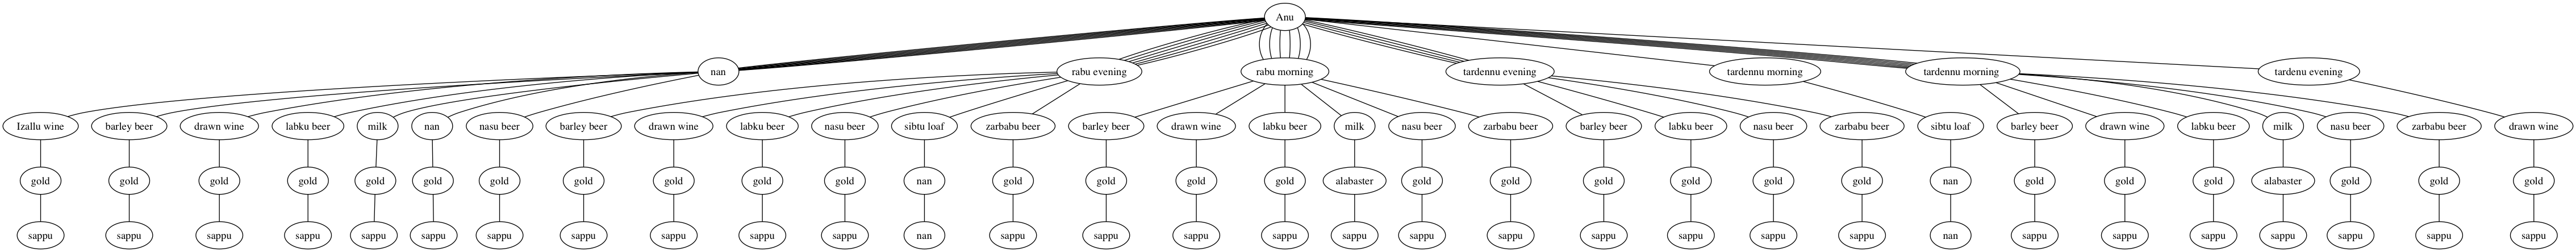

In [24]:
T = PG.AGraph(strict=False)

for x in label_dictionary.keys():
    T.add_node(x, label=label_dictionary[x])
    
count = 0
while count < permutations.num_columns-1:
    permutations.apply((lambda x,y: T.add_edge(x,y)), [count,count+1])
    count += 1
    
T.write('ademo.dot')
T.layout(prog='dot')
T.draw('file.png')
Image('file.png')

In [27]:
from PIL import Image
im = Image.open("file.png")
im.show()

/anaconda/lib/python3.6/site-packages/datascience/tables.py:362: FutureWarning: column lists are deprecated; pass each as an argument
  "column lists are deprecated; pass each as an argument", FutureWarning)


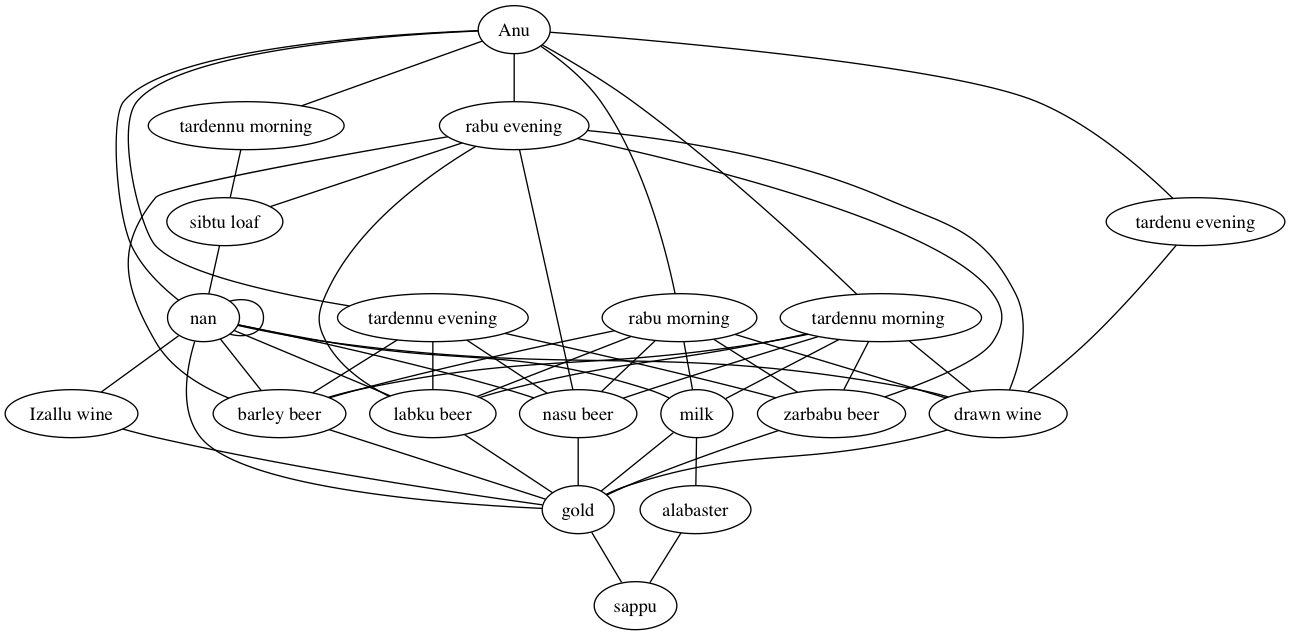

In [25]:
T = PG.AGraph()

row = 0
while row < permutations.num_rows:
    count = 0
    while count < permutations.num_columns-1:
        original.apply((lambda x,y: T.add_edge(x, y)), [count,count+1])
        count += 1
    row+=1
    
T.write('ademo.dot')
T.layout(prog='dot')
T.draw('file.png')
Image('file.png')

In [ ]:
from PIL import Image
im = Image.open("file.png")
im.show()